In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.feature_selection as fs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import numpy as np
from pandas_profiling import ProfileReport
sns.set(font_scale=0.9)
%config InlineBackend.figure_format = 'retina'

with open('task_2_annotations_82d1d6d1093eaab6_e330cbf_pandas.pkl', 'rb') as f:
    annotations = pickle.load(f)
    
with open('task_2_features_1d8b658c21ddc127_e330cbf_pandas.pkl', 'rb') as f:
    features = pickle.load(f)
    
print(annotations.shape)

(2638, 19)


## Annotations

In [2]:
print(annotations.shape)
annotations.describe()

(2638, 19)


,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
count,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000
mean,6.037149,13.000000,97.071645,2.929492,0.020849,2.901440,2.673616,2.366187,2.723275,2.395525,2.313495,2.276725,2.596664,2.148218,2.968537,2.561031,2.434420,2.690178,2.496209
std,3.179759,7.806583,56.340712,1.184031,1.099842,1.267184,1.235916,1.297041,1.371744,1.367916,1.232190,1.239287,1.412181,1.177312,1.329116,1.261079,1.264754,1.258940,1.279556
min,1.000000,0.000000,0.000000,1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,6.000000,48.000000,2.000000,-1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
50%,6.000000,13.000000,97.000000,3.000000,0.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000
75%,9.000000,20.000000,146.000000,4.000000,1.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
max,11.000000,26.000000,194.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [3]:
profile = ProfileReport(annotations, title="Annotations Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Features

In [4]:
print(features.shape)
features.describe()

(2282, 172)


,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
count,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2.282000e+03,2282.000000,2282.000000,2282.000000,...,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,5.958808,12.755039,3.818142,0.188855,0.061153,2.911903,5.563347e+07,2.563729,0.624854,0.101175,...,0.172455,0.000132,0.042511,0.285834,0.196721,0.011317,0.004220,0.006245,0.010869,0.016979
std,3.153401,8.182060,2.891546,0.045299,0.008382,1.734871,6.335631e+07,1.823307,0.053822,0.019604,...,0.042395,0.000996,0.030085,0.136980,0.102406,0.003472,0.000882,0.003028,0.003572,0.004126
min,1.000000,0.000000,0.000000,0.059951,0.025707,0.000000,1.435069e+04,0.200000,0.318932,0.057012,...,0.099175,-0.000052,0.000000,0.030207,-0.201072,0.001226,0.001291,0.000000,0.000643,0.003306
25%,3.000000,6.000000,1.000000,0.157475,0.055926,1.826072,1.598447e+07,1.600000,0.594817,0.087541,...,0.143093,0.000000,0.022643,0.185282,0.133256,0.008831,0.003650,0.003968,0.008375,0.014195
50%,6.000000,13.000000,3.000000,0.189944,0.060098,2.454455,3.282579e+07,2.400000,0.631172,0.098439,...,0.167317,0.000000,0.036141,0.269425,0.174797,0.011168,0.004138,0.005970,0.010673,0.016957
75%,9.000000,21.000000,6.000000,0.220248,0.064796,3.448091,6.815258e+07,3.200000,0.662489,0.112793,...,0.194196,0.000000,0.053860,0.358590,0.236701,0.013746,0.004686,0.008370,0.013430,0.019713
max,11.000000,26.000000,14.000000,0.360551,0.119466,14.830730,4.956515e+08,32.049419,0.767457,0.260845,...,0.433013,0.034168,0.385651,0.902180,1.000000,0.023783,0.008862,0.017414,0.023911,0.030822


## Plot segments 

<b>Pentagon</b> - mean value over all annotations of a segment  <br> 

<b>Lines</b> - quadrant borders  <br> 

<b>Radius</b> of a datapoint corresponds to its populatiry
   (i.e. the bigger the point the more annotators classified it the same)  <br> 

The annotations dataset <b>lacks 2 values</b>:
1) pianist_id = 3; segment_id = 1; annotator_id = 90; <b>gems_peacefulness</b> is missing <br>
2) pianist_id = 10; segment_id = 24; annotator_id = 80; <b>gemmes_interior</b> is missing

In [5]:
def draw_segment_analytics(idx, annotaions):
    seg_annotations = annotations.loc[(annotations["segment_id"] == idx),["arousal", "valence"]]

    arousal_mean, valence_mean = seg_annotations.mean(axis=0).array

    seg_annotations = seg_annotations.groupby(['arousal', 'valence']).size().reset_index().rename(columns={0:'count'})
    arousal = seg_annotations['arousal'].array
    valence = seg_annotations['valence'].array
    pnt_size = seg_annotations['count'].array ** 2

    plt.scatter(arousal, valence, s=pnt_size)
    plt.scatter(arousal_mean, valence_mean, s = max(pnt_size) * 2, marker = 'p')
    plt.axhline(0, color = 'r')
    plt.axvline(3, color='r')
    plt.title("Segment_id = {}".format(idx))
    plt.xlabel("Arousal")
    plt.ylabel("Valence")
    plt.xlim(1, 5)
    plt.ylim(-2, 2)

    plt.show()

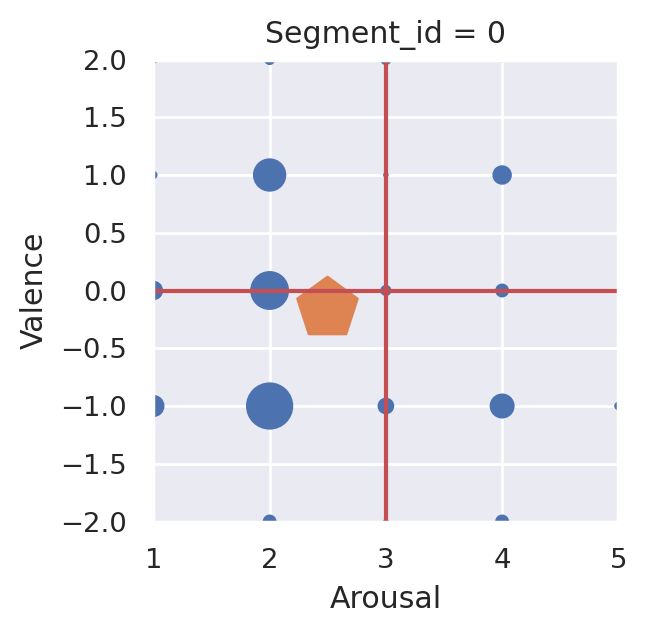

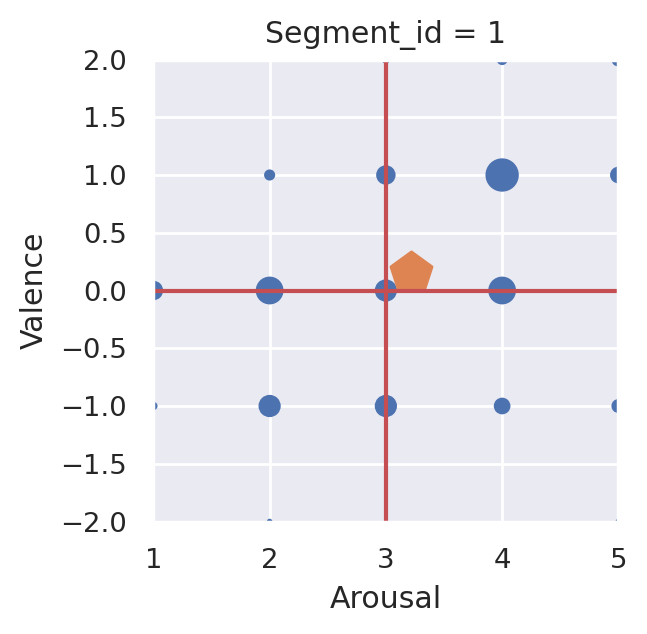

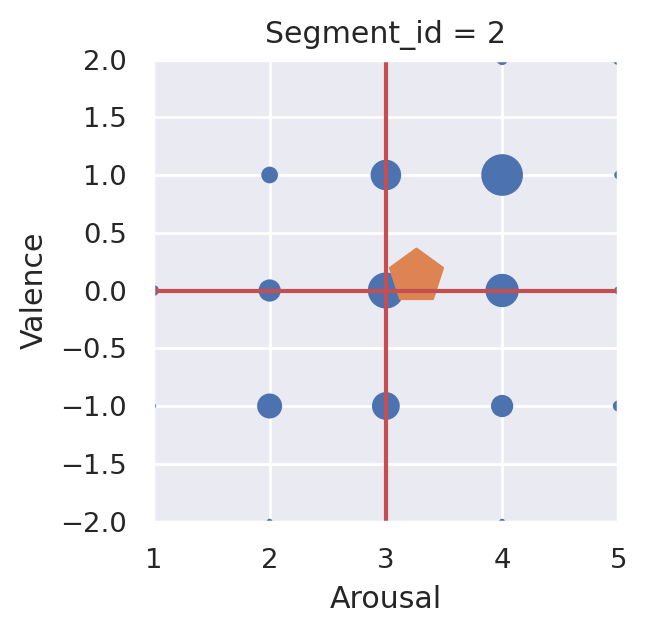

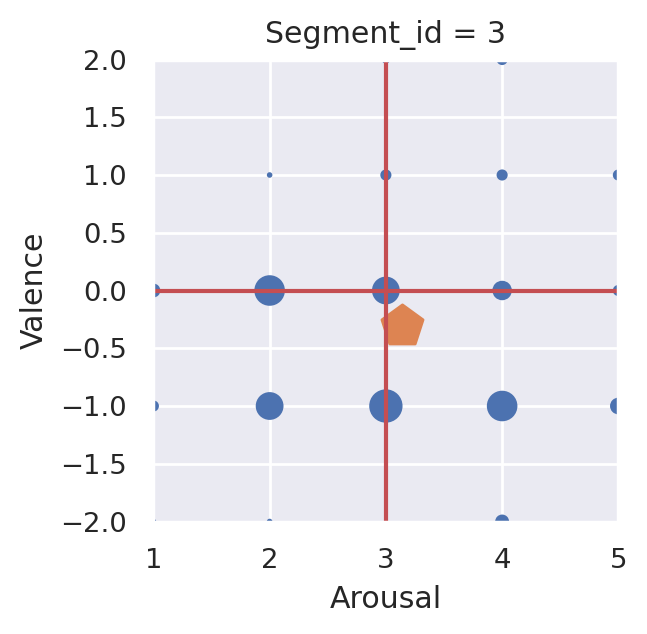

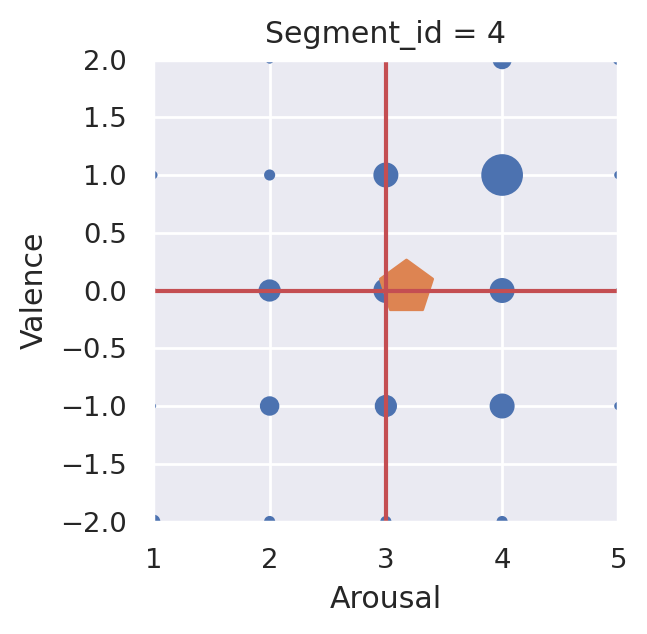

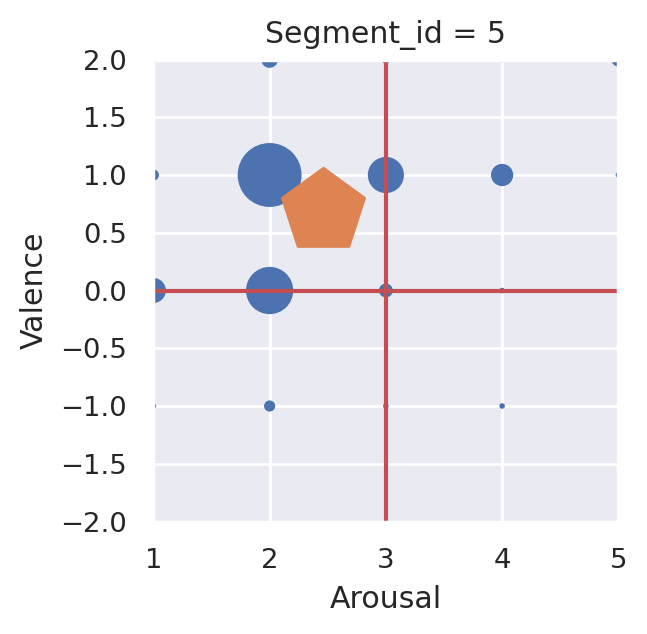

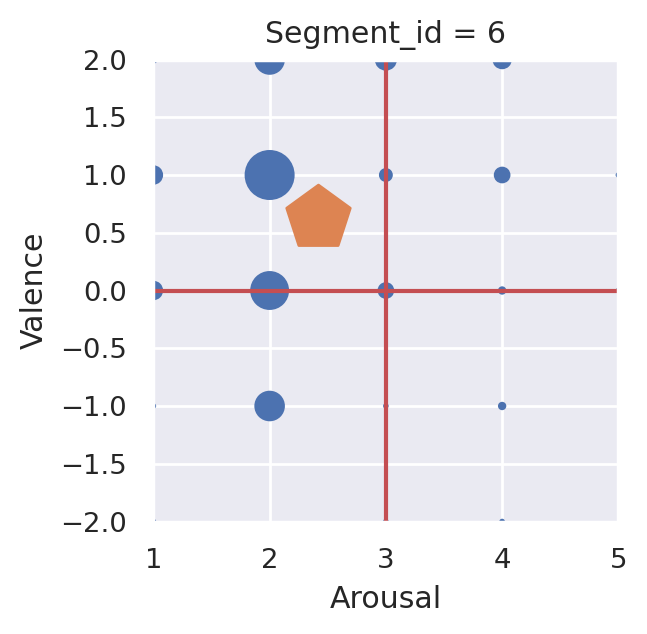

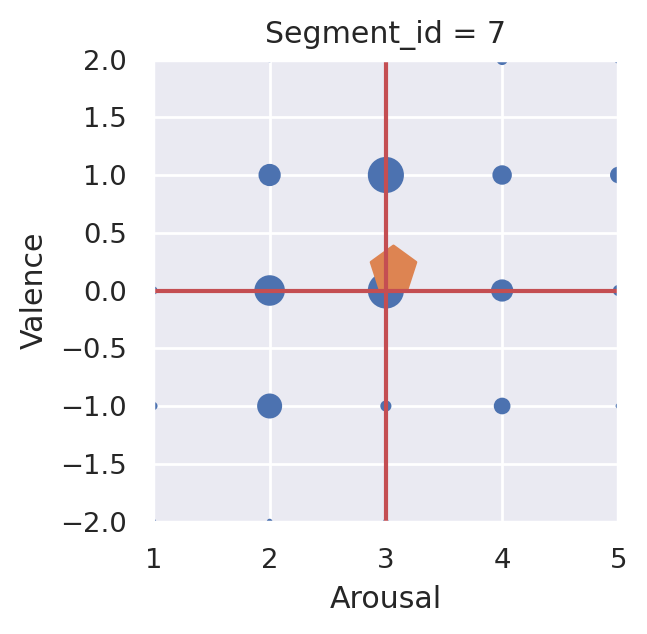

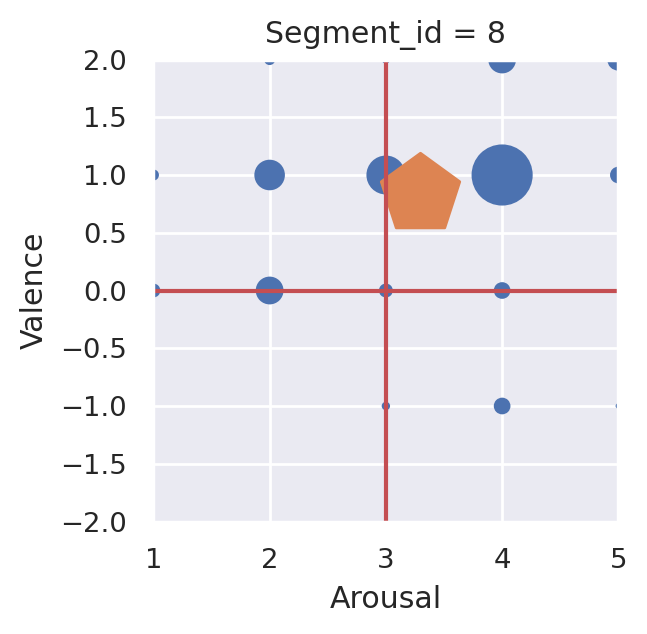

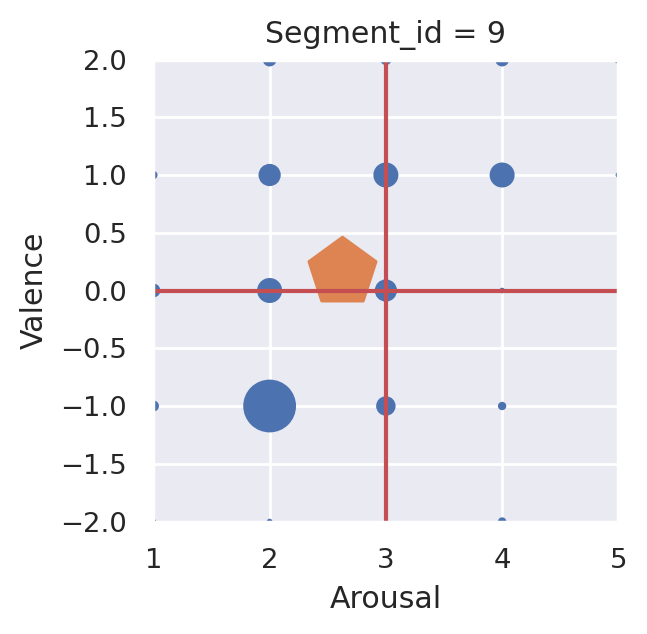

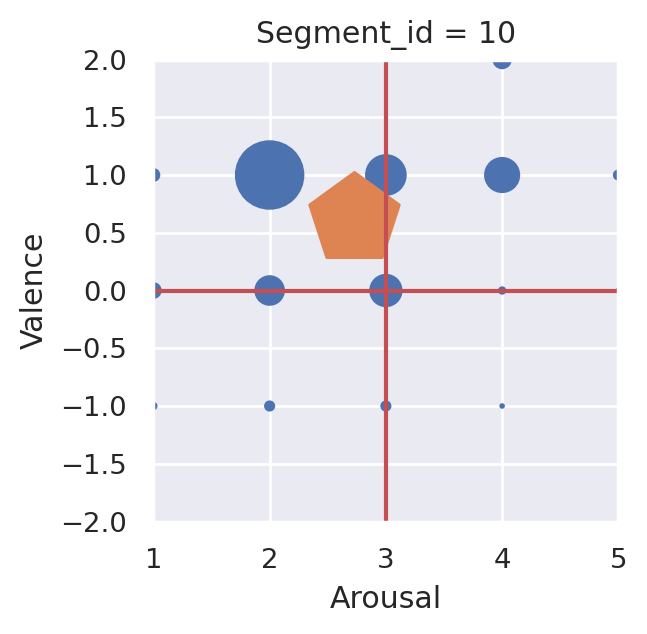

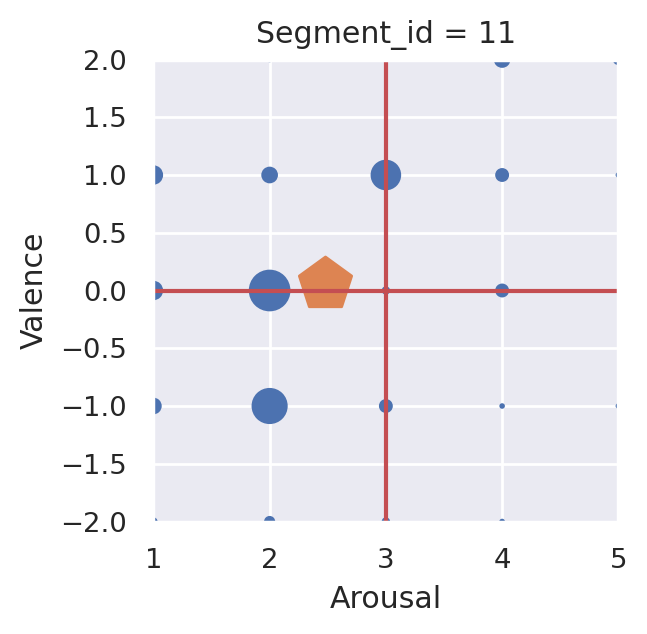

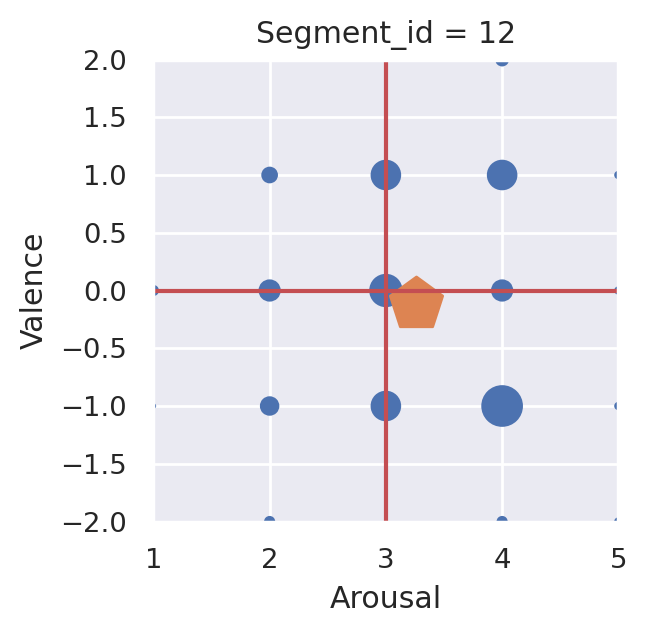

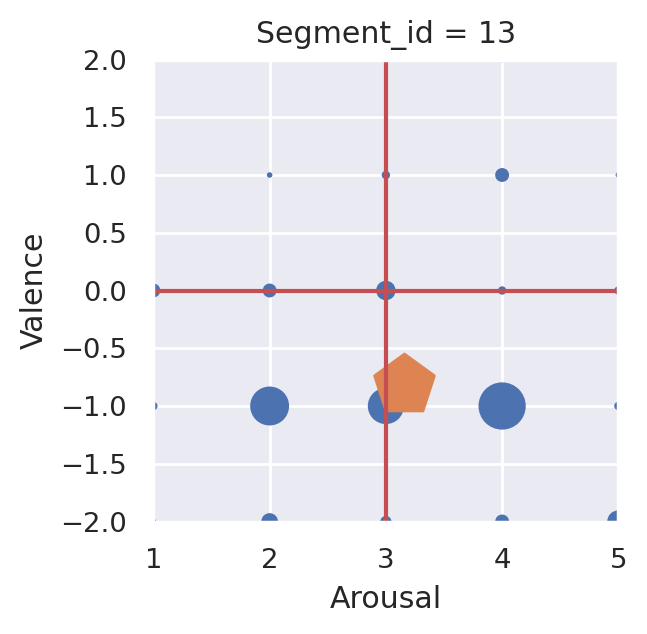

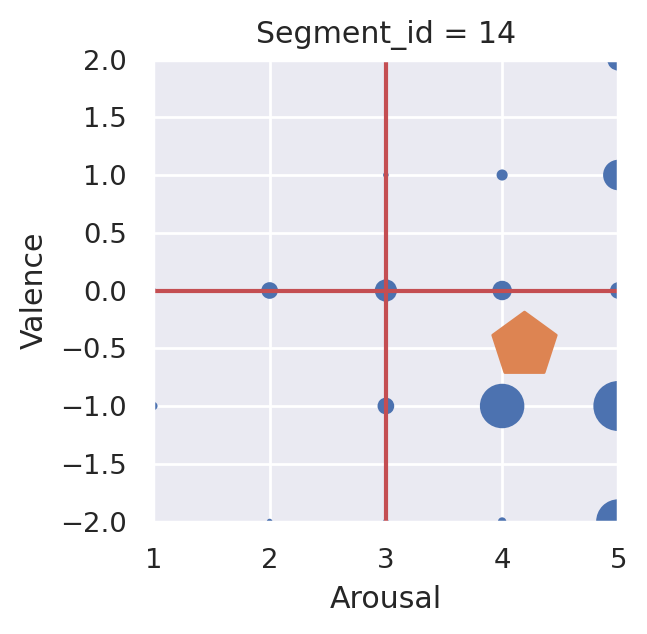

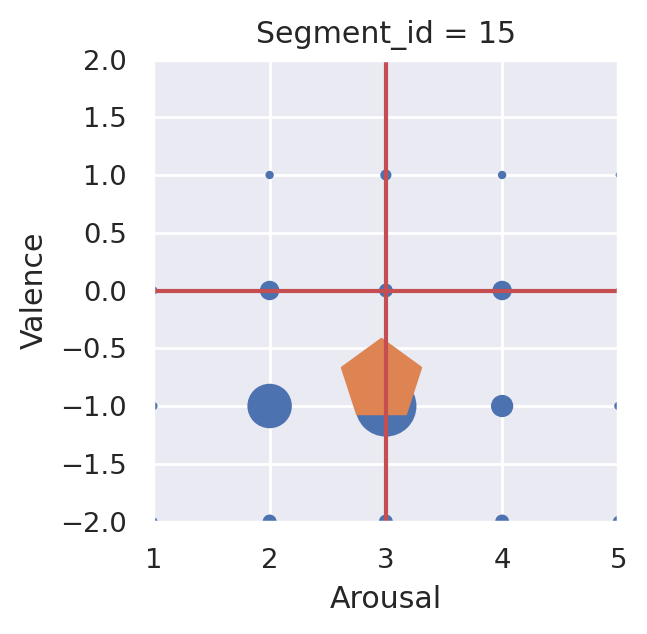

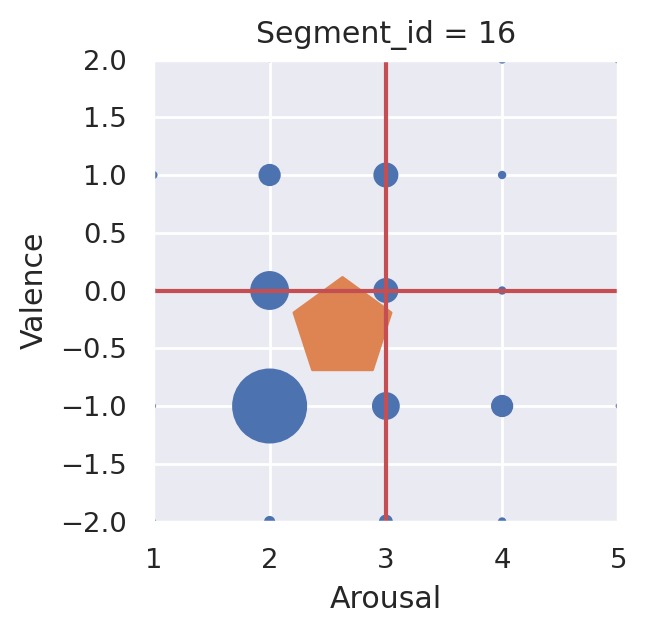

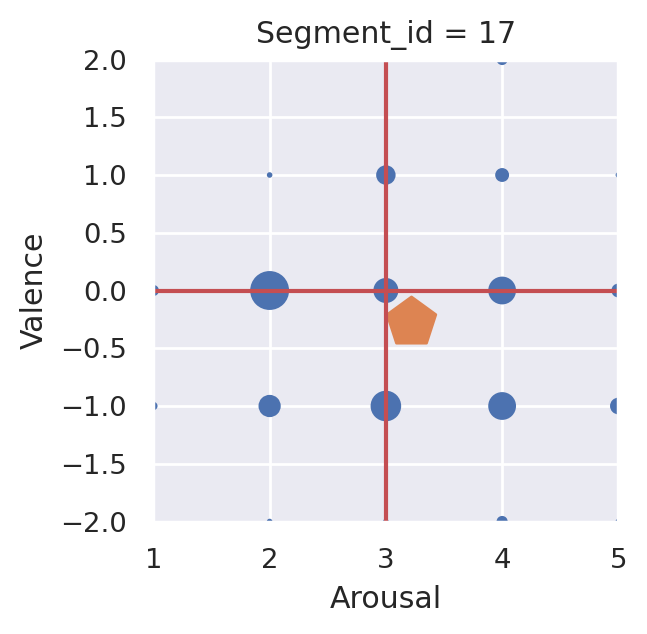

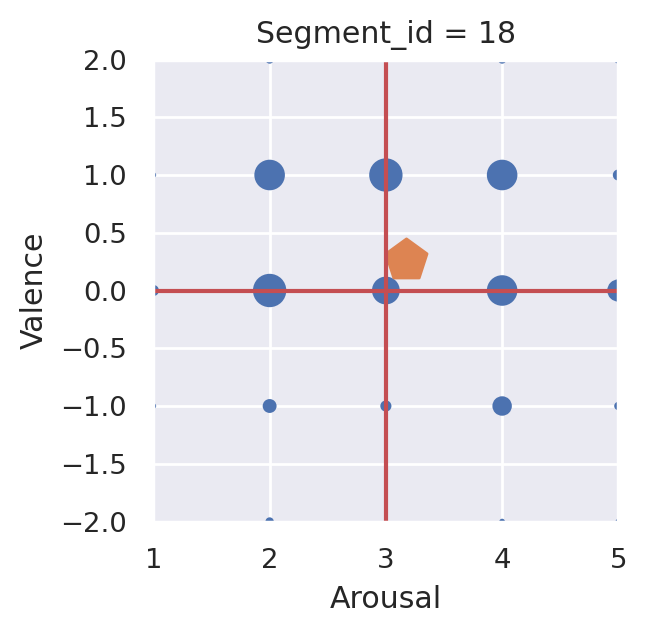

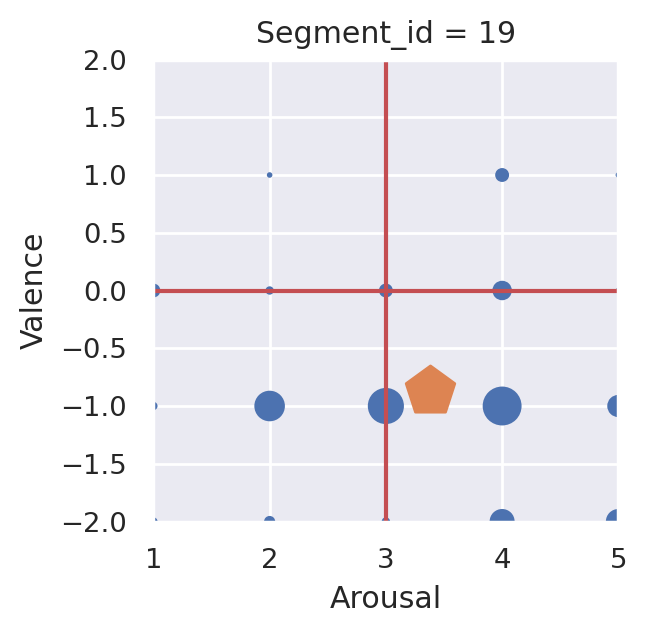

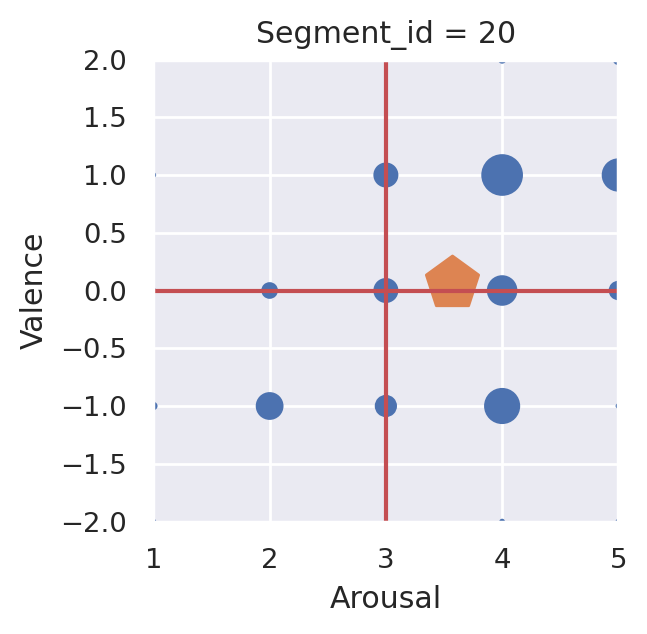

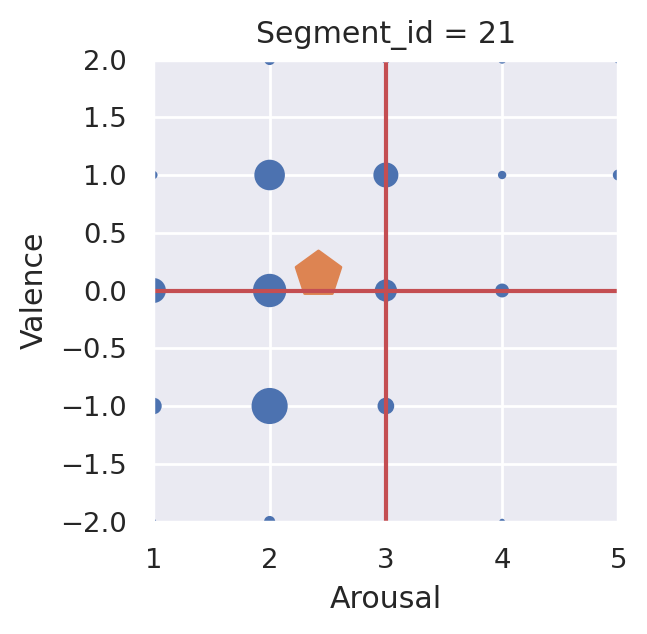

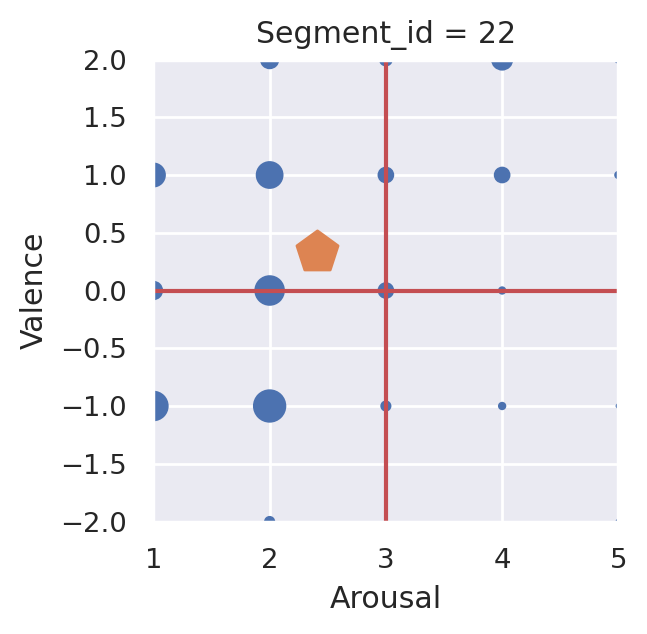

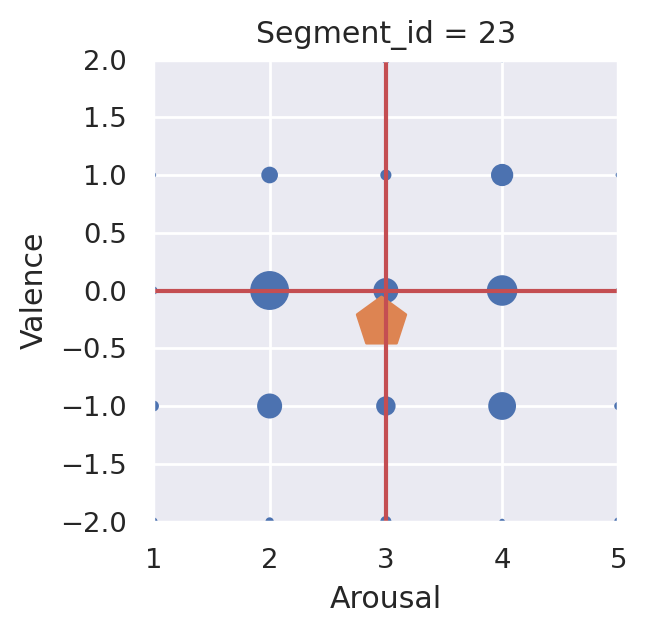

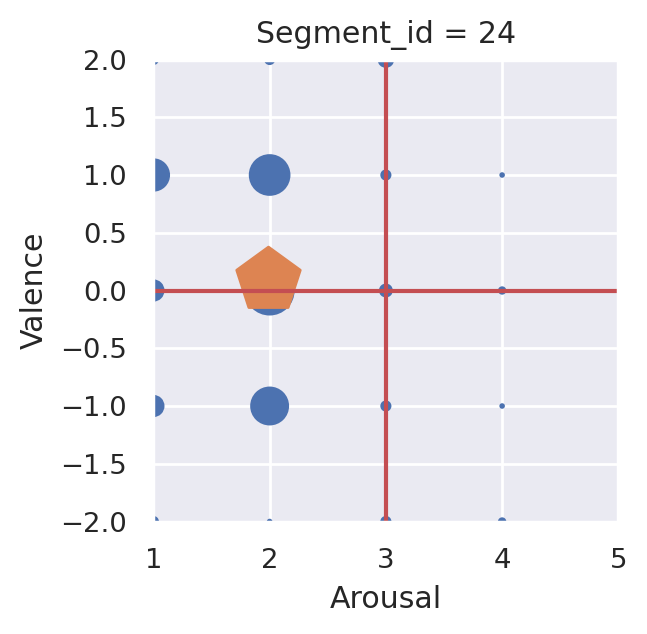

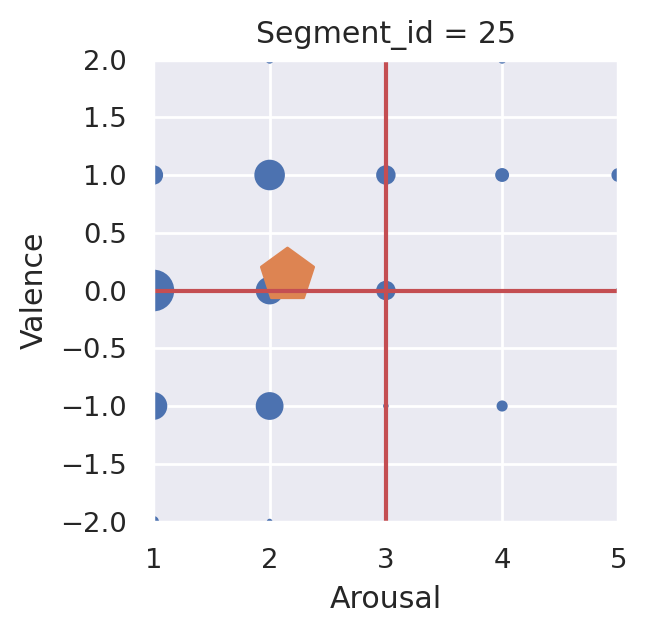

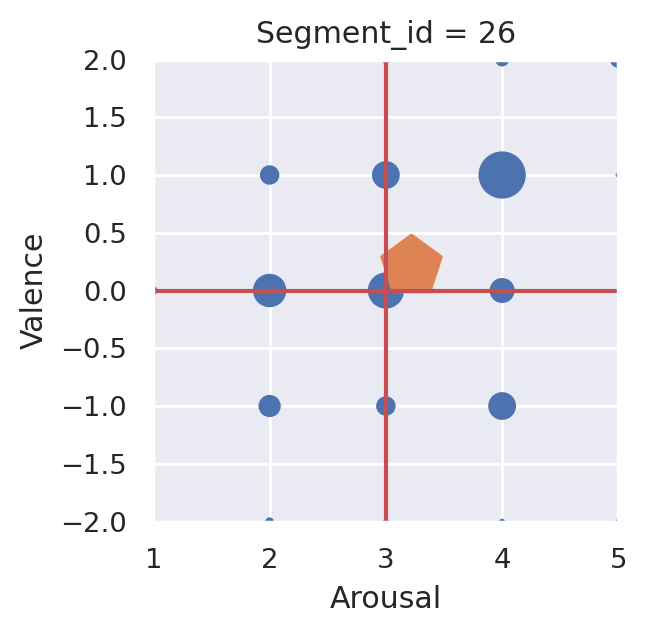

In [6]:
plt.rcParams["figure.figsize"] = (3,3)
seg_num = annotations["segment_id"].nunique(1)
for idx in range(seg_num):
    draw_segment_analytics(idx, annotations)

## 4 descrete classes

1. Happy (valence > 0, arousal >= 3)
2. Angry (valence <= 0, arousal > 3)
3. Sad (valence < 0, arousal <= 3)
4. Relaxed (valence >= 0, arousal < 3)

In [7]:
annot_grouped = annotations[["arousal", "valence"]] \
    .groupby(['arousal', 'valence']) \
    .size().reset_index().rename(columns={0:'count'})

conditions = [
    annot_grouped['valence'].gt(0) & annot_grouped['arousal'].ge(3),
    annot_grouped['valence'].le(0) & annot_grouped['arousal'].gt(3),
    annot_grouped['valence'].lt(0) & annot_grouped['arousal'].le(3),
    annot_grouped['valence'].ge(0) & annot_grouped['arousal'].lt(3),
]

choices = ["happy","angry","sad","relaxed"]

annot_grouped['group'] = np.select(conditions, choices, default="undef")
annot_grouped = annot_grouped[annot_grouped["group"] != "undef"]
annot_grouped

,arousal,valence,count,group
0,1,-2,26,sad
1,1,-1,77,sad
2,1,0,116,relaxed
3,1,1,60,relaxed
4,1,2,11,relaxed
5,2,-2,49,sad
6,2,-1,250,sad
7,2,0,263,relaxed
8,2,1,196,relaxed
9,2,2,46,relaxed


In [8]:
annot_grouped = annot_grouped.groupby(['group']).sum().reset_index().rename(columns={0:'count'})
annot_grouped

,group,arousal,valence,count
0,angry,27,-6,516
1,happy,24,9,635
2,relaxed,9,6,692
3,sad,12,-9,604


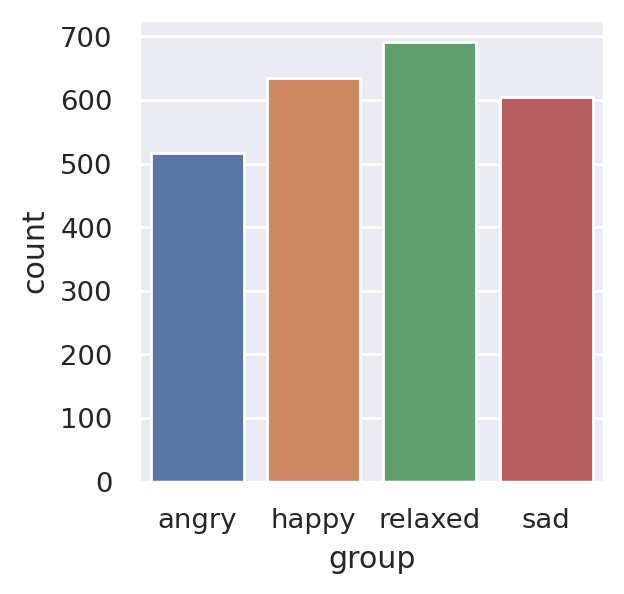

In [9]:
sns.barplot(data=annot_grouped, x="group", y="count");

## How are the features distributed?

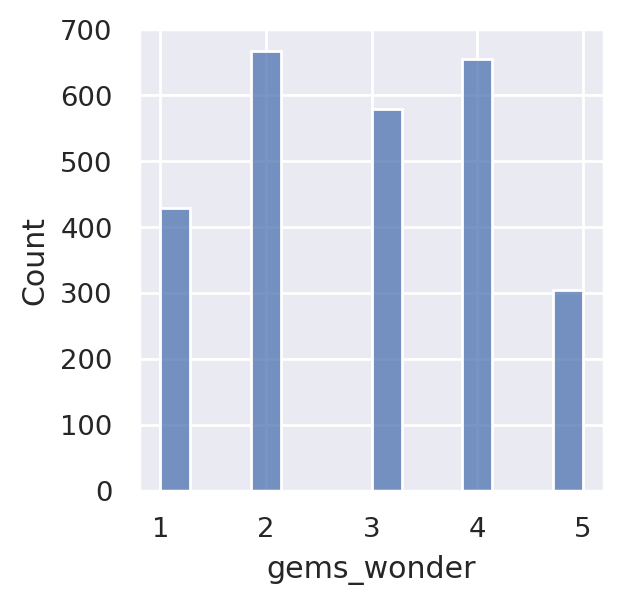

In [37]:
num_cols = annotations.columns.to_list()[3:]
# fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(10, 30))


# for idx, feat in enumerate(num_cols):
#     ax = axes[idx, 0]
#     sns.histplot(annotations[feat], kde=False, ax=ax);
#     ax.set_xlabel('')
#     ax.set_ylabel(feat)
    
#     ax = axes[idx, 1]
#     sns.boxplot(x='valence', y=feat, data=annotations, ax=ax)
#     ax.set_xlabel('valence')
#     ax.set_ylabel('')
    
# fig.tight_layout();
num_cols
annotations['gems_wonder']
sns.histplot(annotations['gems_wonder'], kde=False);

## Remove rows with missing values

In [10]:
print(annotations[annotations.isnull().any(axis=1)].index)
annotations.drop(index=annotations[annotations.isnull().any(axis=1)].index, inplace=True)
print(annotations[annotations.isnull().any(axis=1)].index)

Int64Index([5115, 2957], dtype='int64')
Int64Index([], dtype='int64')


## Selection of the most valuable features 

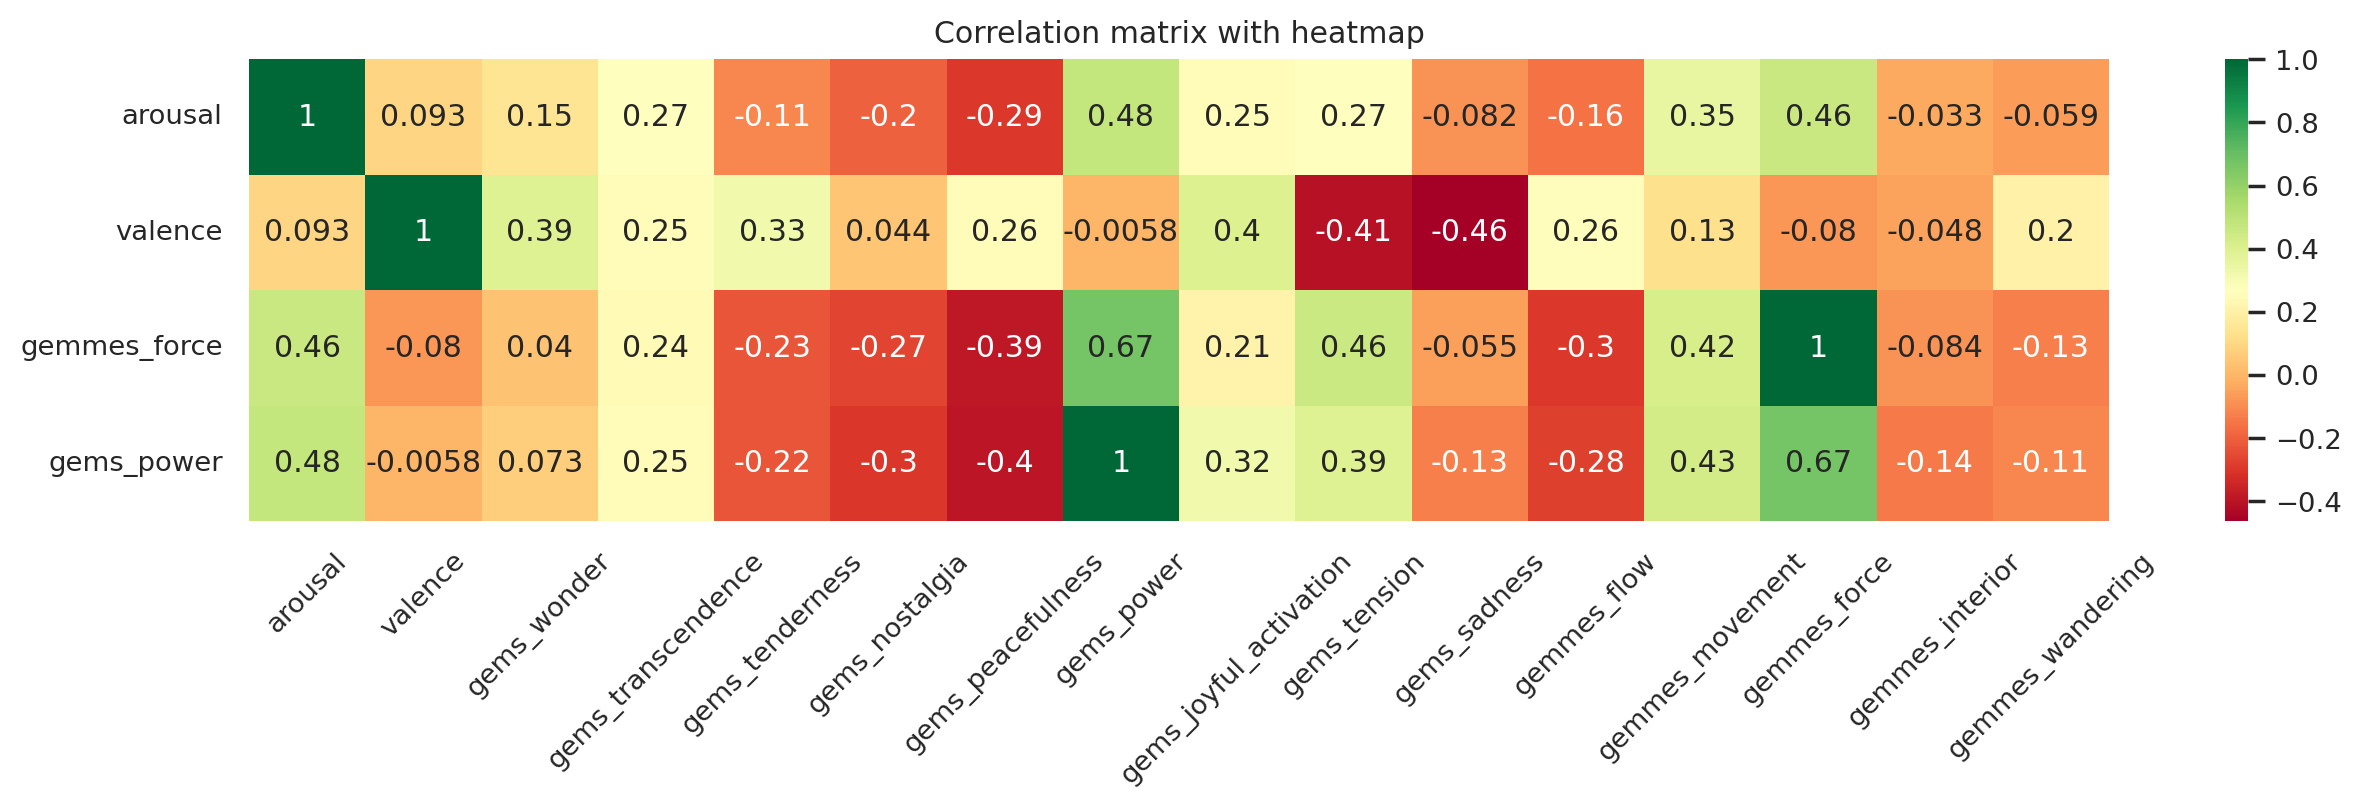

In [11]:
# Correlation btw A/V and annotations
# Center the data // doesn't matter for correlation 
centered_ann = annotations.loc[:, 'arousal':]
centered_ann = centered_ann.subtract(centered_ann.mean())

f = plt.figure(figsize=(15,3))
ax = f.add_subplot()
sns.heatmap(centered_ann.corr().loc[['arousal', 'valence', 'gemmes_force', 'gems_power'], :],annot=True,cmap="RdYlGn", ax = ax)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.title("Correlation matrix with heatmap")
plt.show()

# The most correlated features are 
# arousal: gems_power(0.475225) and gemmes_force(0.462607)
# valence: gems_wonder(0.393563) and gems_joyful_activation(0.399462)
# valance decorrelation: gems_sadness(-0.463651) and gems_tension(-0.407697)

In [12]:
# Univariate feature selection
score_funcs = [fs.chi2, fs.f_classif, fs.mutual_info_classif]
all_features = annotations.loc[:, 'gems_wonder':]
arousal = annotations.loc[:, ['arousal']]
valence = annotations.loc[:, ['valence']]
labels = [arousal, valence] 
most_important_f = dict()
for label in labels:
    most_important_f[list(label.columns)[0]] = set()
    for func in score_funcs:
        bestfeatures = fs.SelectKBest(score_func=func, k=10)
        
        fit = bestfeatures.fit(all_features, np.ravel(label.to_numpy(dtype='float64')))
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(all_features.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score'] 
        print("The most important features wrt {}".format(list(label.columns)[0]))
        print(featureScores.nlargest(6,'Score'))
        print()
        
        if len(most_important_f[list(label.columns)[0]]) != 0:
            most_important_f[list(label.columns)[0]] = most_important_f[list(label.columns)[0]].intersection(set(featureScores.nlargest(6,'Score')['Specs']))
        else:
            most_important_f[list(label.columns)[0]] = set(featureScores.nlargest(6,'Score')['Specs'])
#     print(np.unique(most_important_f[list(label.columns)[0]]))

print("==========================")

print("Features that worth considaration")
for key in list(most_important_f.keys()):
    print("For {}".format(key))
    for feature in most_important_f[key]:
        print("* {}".format(feature))
    print()

The most important features wrt arousal
                 Specs       Score
5           gems_power  403.596518
11        gemmes_force  382.280164
10     gemmes_movement  205.727021
4    gems_peacefulness  179.995400
7         gems_tension  146.963138
1   gems_transcendence  113.530521

The most important features wrt arousal
                 Specs       Score
5           gems_power  200.237213
11        gemmes_force  186.643899
10     gemmes_movement   94.628708
4    gems_peacefulness   63.025200
1   gems_transcendence   53.663411
7         gems_tension   51.482106

The most important features wrt arousal
                 Specs     Score
5           gems_power  0.127391
11        gemmes_force  0.120865
10     gemmes_movement  0.081350
4    gems_peacefulness  0.056580
7         gems_tension  0.050579
1   gems_transcendence  0.049950

The most important features wrt valence
                    Specs       Score
8            gems_sadness  427.175338
7            gems_tension  343.460021
6 

In [13]:
# Tree-based feature selection

for label in profile.to_widgets():
    model = RandomForestClassifier(min_samples_leaf=10, n_estimators=100)
    model.fit(all_features, np.ravel(label.to_numpy(dtype='float64')))
    feat_importances = pd.Series(model.feature_importances_, index=all_features.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title("Feature importance wrt {}".format(list(label.columns)[0]))
    plt.show()

TypeError: 'NoneType' object is not iterable

```






```



3. How are the resulting discrete class labels *distributed*? Are the classes *unbalanced*, and how much? How are the features *distributed*? Are there any pairs or subsets of features that seem highly correlated or redundant?
4. How are *GEMS9* and *GEMMES* related to *arousal* and *valence*?